# *Подключение необходимых библиотек*

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# *Постановка задачи*
## *«Станет ли песня хитом Spotify?»*

Необходимо решить задачу бинарной классификации музыки «Станет ли песня хитом Spotify?».

Датасет включает в себя более 40000 объектов, 18 признаков, а также целевую метку. Используя собранную о треке информацию, необходимо определить станет ли трек популярным или окажется «провальным».

Трек считается *«провальным»* в случае выполнения следующих условий:

1. Трек не должен попадать в «хит-лист» текущего десятилетия.
2. Исполнитель трека не должен фигурировать в «хит-листе» прошлого десятилетия.
3. Трек должен принадлежать к жанру, который можно считать неосновным и / или авангардным.
4. Жанр трека не должен иметь композицию в списке «хит».

*Примечание*: автор объективно не считает трек второстепенным, плохим или провальным, если он помечен как «Flop». «Flop» здесь  означает, что этот трек, вероятно, не может считаться популярным в мейнстриме.)

Приведём описание признаков:


1. **track**: Название трека.
2. **artist**: Имя исполнителя.
3. **uri**: Идентификатор ресурса для трека.
4. **danceability**: Танцевальность - описывает, насколько подходит трек для танцев в зависимости от комбинации музыкальных элементов, включая темп, стабильность ритма, силу удара и общую регулярность. Значение 0.0 наименее танцевально, а 1.0 - наиболее танцевально.
5. **energy**: Энергия - мера от 0.0 до 1.0 (мера интенсивности и активности). Обычно энергичные треки кажутся быстрыми, громкими и шумными. Например, дэт-метал обладает высокой энергией, а прелюдия Баха имеет низкие оценки по шкале. Характеристики восприятия, влияющие на этот атрибут, включают динамический диапазон, воспринимаемую громкость, тембр, скорость начала и общую энтропию.
6. **key**: Предполагаемая общая тональность трека. Целые числа отображаются на высоту звука с использованием стандартной записи класса высоты звука. Если ключ не обнаружен, значение равно -1.
7. **loudness**: Общая громкость трека в децибелах (дБ). Значения громкости усредняются по всей дорожке и полезны для сравнения относительной громкости дорожек. Громкость - это качество звука, которое является основным психологическим коррелятом физической силы (амплитуды).Типичный диапазон значений от -60 до 0 дБ.
8. **mode**: Признак указывает модальность (мажор или минор) трека, тип звукового ряда, из которого получено его мелодическое содержание. Мажор представлен 1, минор - 0.
9. **speechiness**: Признак речи - определяет наличие произнесенных слов в дорожке. Чем болеьше запись похожа на речь (например, ток-шоу, аудиокнига, стихи), тем ближе значение атрибута к 1.0.
10. **acousticness**: Мера достоверности того, является ли трек акустическим (от 0.0 до 1.0). 1.0 означает высокую степень уверенности в том, что трек акустический.
11. **instrumentalness**: Инструментальность определяет, будет ли трек содержать вокал. В этом контексте звуки «ох» и «ааа» считаются инструментальными. Рэп или звуковые дорожки явно «вокальные». Чем ближе значение инструментальности к 1.0, тем больше вероятность, что трек не содержит вокального содержания. Значения выше 0,5 предназначены для представления инструментальных треков, но достоверность выше, чем ближе значение к 1,0.
12. **liveness**: Натуральность обнаруживает присутствие аудитории в записи. Более высокие значения представляют собой повышенную вероятность того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек будет живым.
13. **valence**: Валентность (от 0.0 до 1.0) описывает музыкальную позитивность, передаваемую треком. Треки с высокой валентностью звучат более позитивно (например, счастливые, веселые, эйфорические), а треки с низкой валентностью - более негативные (например, грустные, подавленные, сердитые).
14. **tempo**: Общий оценочный темп трека в ударах в минуту (BPM). В музыкальной терминологии темп - это скорость или темп данной пьесы, полученный непосредственно из средней продолжительности удара.
15. **duration_ms**: Продолжительность трека в миллисекундах.
16. **time_signature**: Примерный общий размер трека.
17. **chorus_hit**: Лучшая оценка автора того, когда начнется припев для трека. Это отметка времени начала третьей части трека. Эта функция была извлечена из данных, полученных вызовом API для анализа звука этой конкретной дорожки.
18. **sections**: Количество разделов в конкретном треке. Эта функция была извлечена из данных, полученных вызовом API для анализа звука этого конкретного трека.  Разделы представляют из себя: вступление или интро, экспозицию, разработку, репризу, припев, хор или рефрен, заключение, коду или концовка, фейдер, бридж или интерлюдию.
19. **target**: Целевая переменная для трека. Это может быть «0» или «1». «1» означает, что эта песня фигурировала в еженедельном списке (выпущенном Billboards) треков Hot-100 за это десятилетие хотя бы один раз и, следовательно, является «хитом». «0» означает, что трек - «flop».

# *Загрузка данных*

In [2]:
url = "https://raw.githubusercontent.com/chenkova-a/MachineLearning/main/data.csv"
data_original = pd.read_csv(url)

In [3]:
data_original.shape

(41106, 19)

Как видно из данных о загруженной таблице, она содержит 41106 обект, 18 признаков, 1 целевую метку.

Рассмотрим несколько первых строк данной таблицы:

In [4]:
data_original.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


Получим имена столбцов:

In [5]:
data_original.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

Как видно, имена столбцов - это названия признаков, перечисленные в постановке задачи.  Параметры track и uri являются уникальными для кажого объекта, поэтому сделать выводы, основываясь на их значения, нельзя. 

Поэтому удалим два данных столбца, а также столбец с признаком *artist*, так как данный признак не влияет на то, станет ли трек хитом, что было проверено :

In [6]:
data_new=data_original.drop(columns=['track','uri','artist'])
data_new.shape

(41106, 16)

# *Визуализация данных и описательная статистика*

Получим сводную информацию о признаках, вызвав метод *describe*:

In [7]:
data_new.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599792,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

Из таблицы видно, что многие признаки принимают значения от 0.0 до 1.0. Однако для некоторых признаков диапозон значений большой (например, для duration_ms от 15 000 до 4 170 000). Отсюда делаем вывод, что в дальнейшем нам потребуется нормализовать данные.

Так как в данной задаче много признаков то , чтобы не загромождать общий график, визуализируем сначала 3 признака (loudness, sections, chorus_hit) отдельно:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

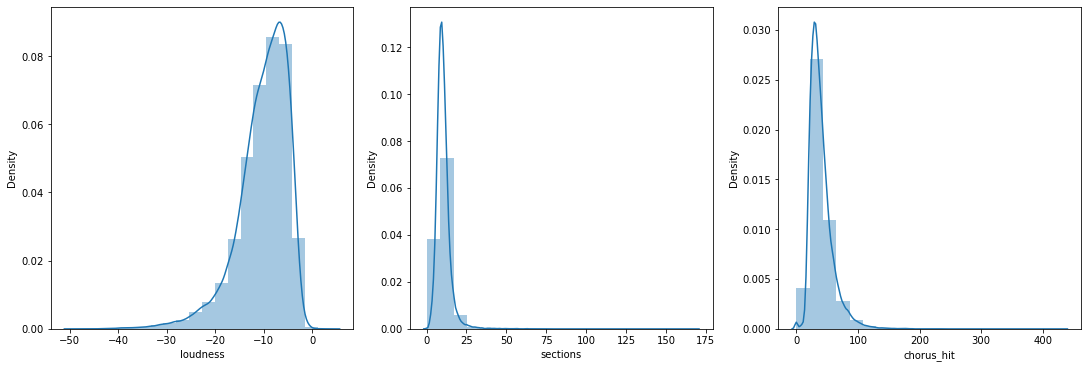

In [8]:
fig, ax = plt.subplots(1,3, figsize=(15,5), constrained_layout=True)

sns.distplot(data_new['loudness'], bins=20, ax=ax[0])
sns.distplot(data_new['sections'], bins=20, ax=ax[1])
sns.distplot(data_new['chorus_hit'], bins=20, ax=ax[2])
pass

Проверим, как часто встречаются большие по модулю значение признаков (так как судя по графикам, они встречаются довольно редко):

In [9]:
np.sum(data_new['loudness'] < -40)

20

In [10]:
np.sum(data_new['sections'] > 75)

11

In [11]:
np.sum(data_new['chorus_hit'] > 200)

12

Как видно, признаки выше редко принимают большие по модулю значения, учитывая, что мы рассматриваем более 40 тыс. объектов (например, признак sections принимает значение более 75 только 11 раз).

Построим теперь графики для ещё 3-х признаков (time_signature, mode и key):

<AxesSubplot:xlabel='key', ylabel='count'>

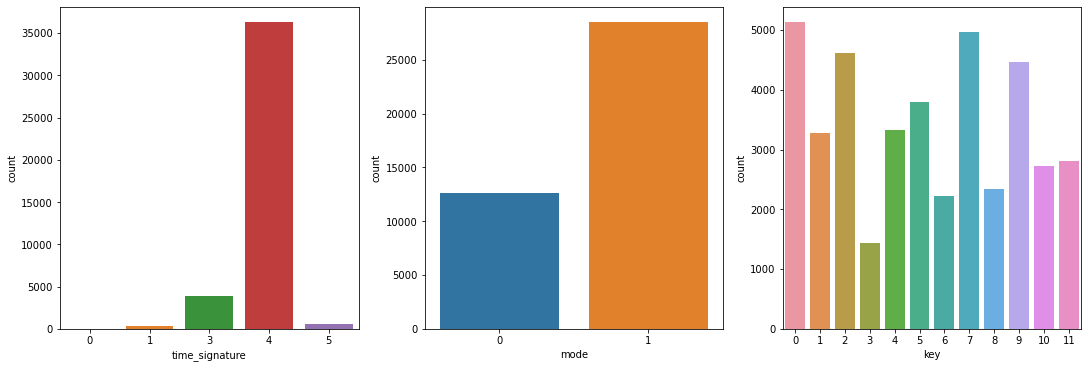

In [12]:
fig, ax = plt.subplots(1,3, figsize=(15,5), constrained_layout=True)

sns.countplot(x ='time_signature', data = data_new, ax=ax[0])
sns.countplot(x ='mode', data = data_new, ax=ax[1])
sns.countplot(x ='key', data = data_new, ax=ax[2])

График mode  демонстрирует, что треков с модальностью "мажор" примерно в 2 раза больше, чем с модальностью "минор". 

График key  отображает, что реже всего встречаются треки с тональностью звука равной 3. 

Признак time_signature отвечает за примерный размер файла. Как видно из графика time_signature чаще всего принимает значение 4 и имеет мало значений, равных нулю. Проверим, сколько именно таких значений имеется: 

In [13]:
np.sum(data_new['time_signature'] == 4)

36297

In [14]:
np.sum(data_new['time_signature'] == 0)

3

Нашлось всего 3 объекта со значением параметра time_signature 0. Эти объекты лучше удалить из выборки (сделаем это при борьбе с выбросами).

Теперь построим все возможные диаграммы рассеивания для каждой пары ещё не визуализируемых данных, используя *pairplot* (сгенерировав перед этим случайную подвыборку из 1000 точек, так как отрисовка всех точек займет много времение, и они будут накладываться друг на друга): 

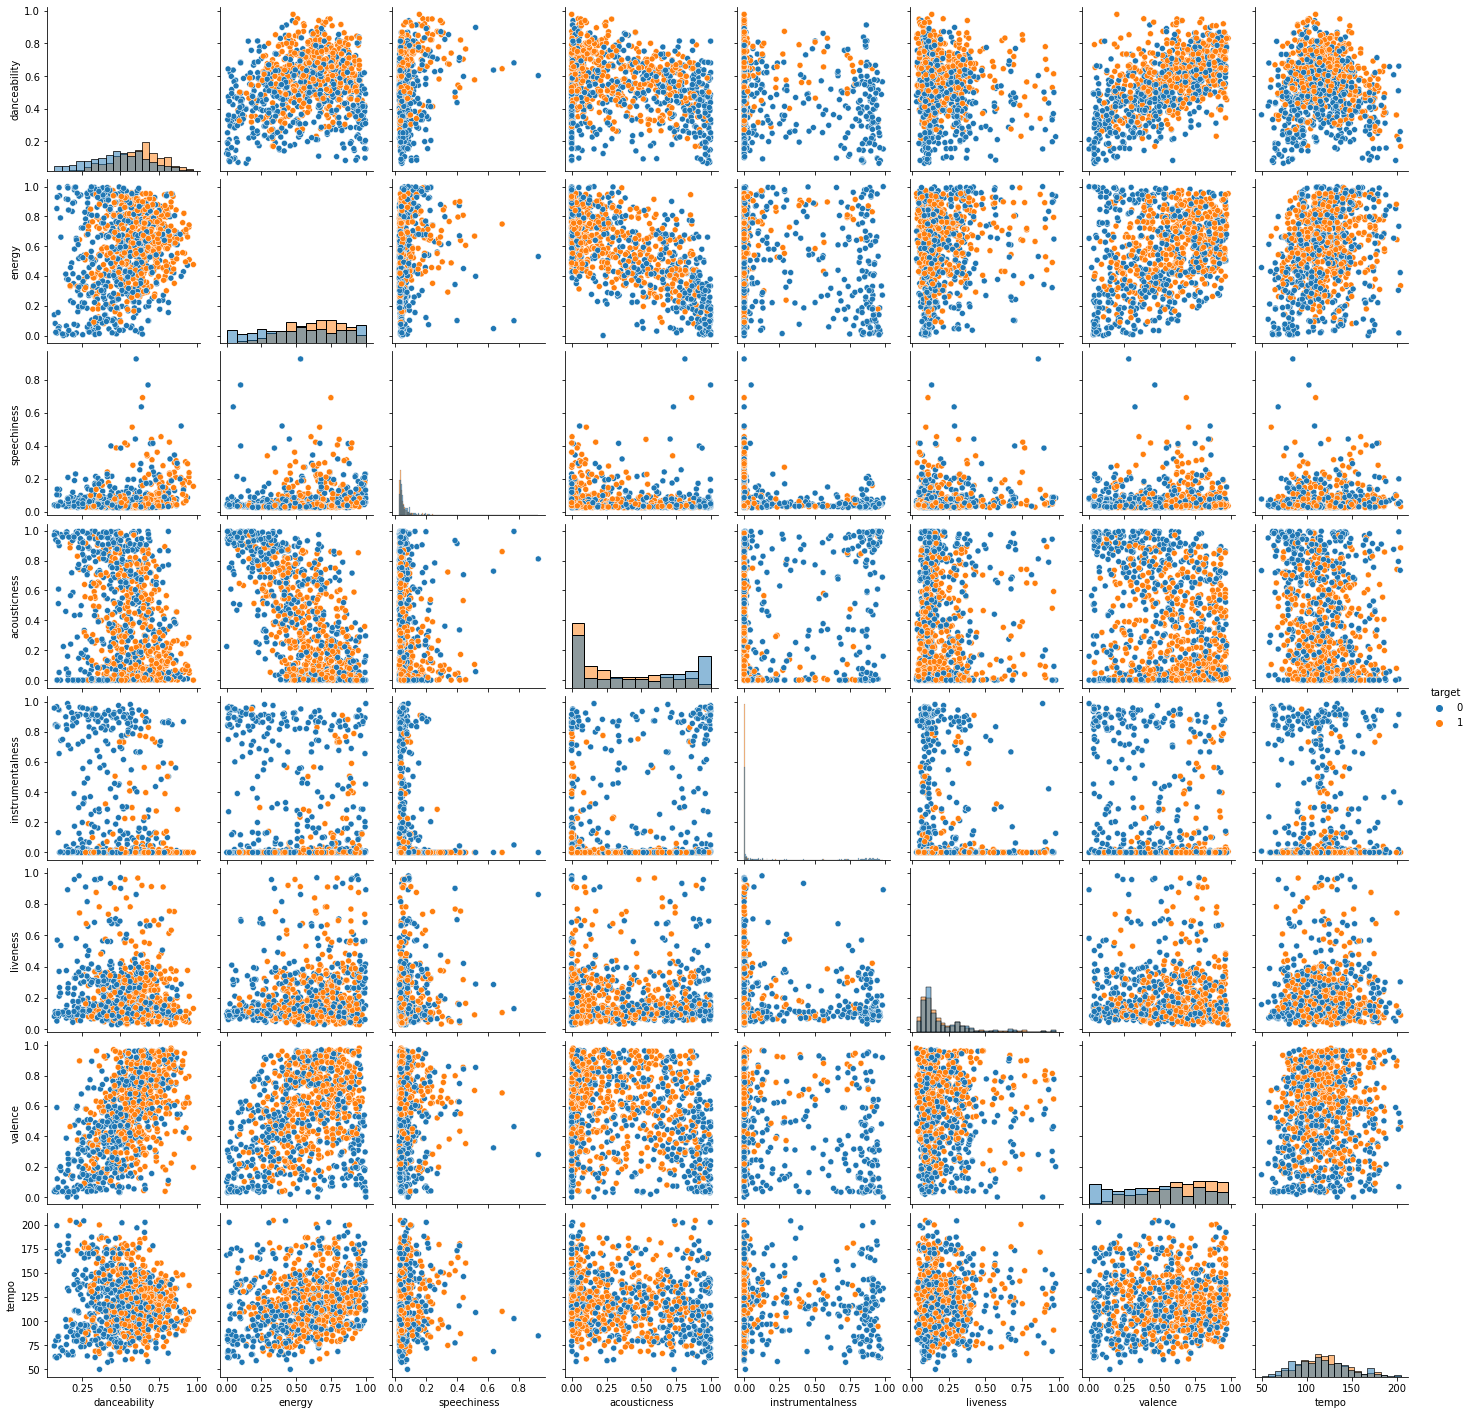

In [15]:
random_subset = np.random.choice(np.arange(data_new.shape[0]), size=1000, replace=False)
df_temp = data_new[['danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'target']]

sns.pairplot(df_temp.iloc[random_subset], diag_kind='hist', hue='target')

Корреляция между признаками не наблюдается. Причиной этого может быть то, что на данных диаграммах изображены не все попарные варианты признаков. Или причина в отсутвии линейной зависимости. Чтобы это проверить, построим матрицу корреляций.

In [16]:
corr = data_new.corr()
corr

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,1.000000,0.206128,0.015433,0.274160,-0.032743,0.156452,-0.261252,-0.301915,-0.115251,0.553858,-0.066541,-0.063030,0.191664,-0.036277,-0.058615,0.346097
energy,0.206128,1.000000,0.022523,0.772628,-0.033780,0.122430,-0.715088,-0.208153,0.157779,0.341427,0.224018,0.011830,0.196072,0.009620,-0.040233,0.177142
key,0.015433,0.022523,1.000000,0.008438,-0.140455,0.026515,-0.024178,-0.013101,0.000668,0.007742,0.001154,0.015493,0.004757,0.010264,0.006784,0.009883
loudness,0.274160,0.772628,0.008438,1.000000,0.000509,0.069241,-0.566548,-0.374301,0.086708,0.271775,0.169453,-0.049890,0.165520,-0.013401,-0.080065,0.286034
mode,-0.032743,-0.033780,-0.140455,0.000509,1.000000,-0.059636,0.049961,-0.075992,0.008886,0.035636,0.027053,-0.074828,-0.009483,-0.022594,-0.057095,0.079614
speechiness,0.156452,0.122430,0.026515,0.069241,-0.059636,1.000000,-0.083948,-0.084092,0.131488,0.001528,0.036854,0.007631,0.021085,0.012972,-0.008636,-0.040835
acousticness,-0.261252,-0.715088,-0.024178,-0.566548,0.049961,-0.083948,1.000000,0.204137,-0.030765,-0.195331,-0.179700,-0.070271,-0.188139,-0.012409,-0.016824,-0.246036
instrumentalness,-0.301915,-0.208153,-0.013101,-0.374301,-0.075992,-0.084092,0.204137,1.000000,-0.050582,-0.287047,-0.053618,0.106551,-0.077980,0.048654,0.081188,-0.407638
liveness,-0.115251,0.157779,0.000668,0.086708,0.008886,0.131488,-0.030765,-0.050582,1.000000,0.000784,0.024861,0.005336,0.004773,0.037981,-0.011742,-0.051445
valence,0.553858,0.341427,0.007742,0.271775,0.035636,0.001528,-0.195331,-0.287047,0.000784,1.000000,0.107901,-0.172166,0.155669,-0.059120,-0.133527,0.251147


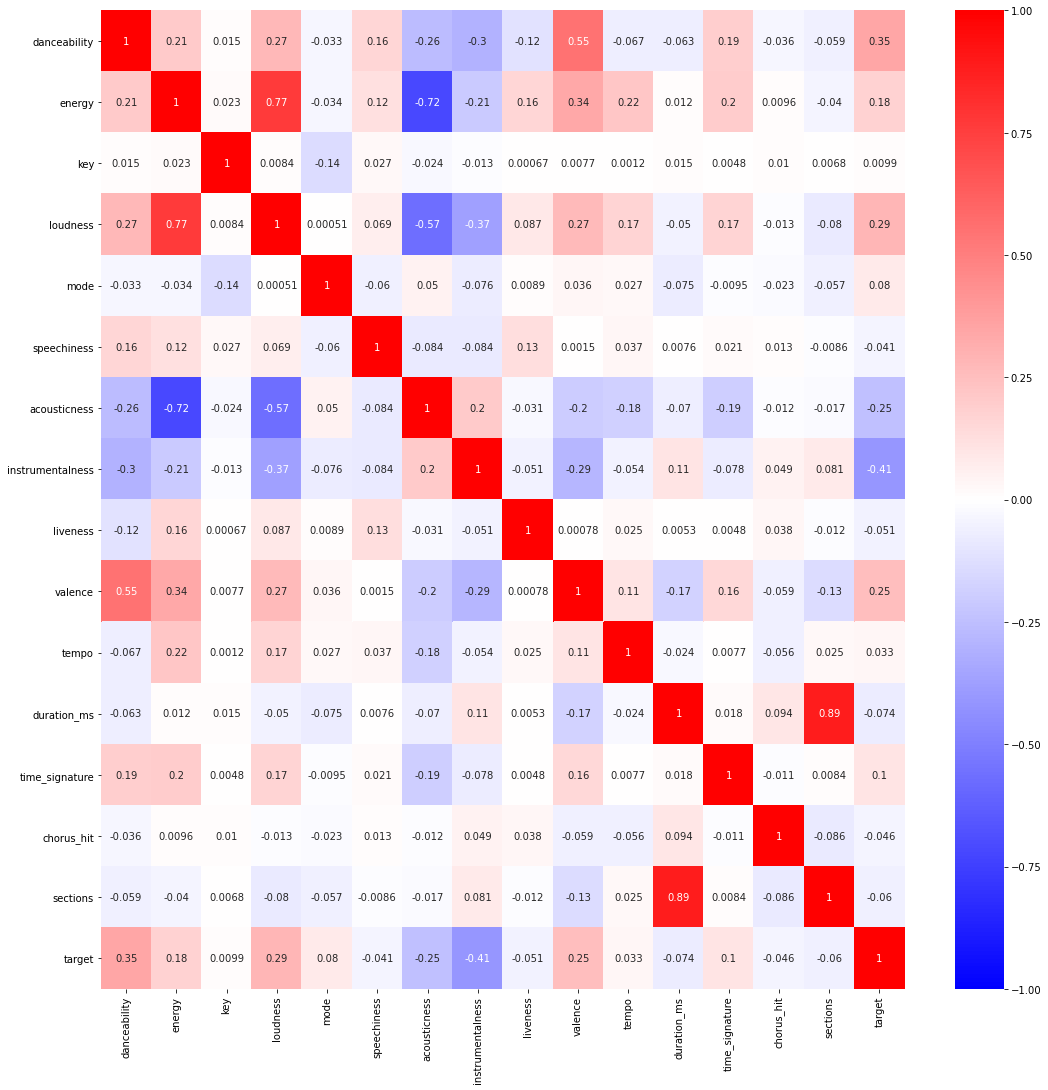

In [17]:
data,ax=plt.subplots(figsize=(18, 18))
ax=sns.heatmap(corr, center=0, annot=True, cmap='bwr', vmin=-1, vmax=1,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Из матрицы видно, что  не так много сочетаний признаков, для которых корреляция является большой. Выведем признаки, между которыми корреляция превышает 0.5 (по модулю):

In [18]:
corr.where(np.triu((corr < -0.5) | (corr > 0.5), k=1)).stack().sort_values(ascending=False)

duration_ms   sections        0.888952
energy        loudness        0.772628
danceability  valence         0.553858
loudness      acousticness   -0.566548
energy        acousticness   -0.715088
dtype: float64

Коррелирующих признаков встречается мало. Только у 4-х пар признаков наблюдается сильная корреляция.

Построим график для признака instrumentalness, из которого прослеживается зависимость: чем большее значение имеет данный признак, тем скорее всего трек окажется "провальным":

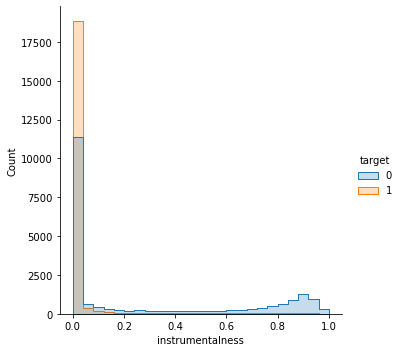

In [19]:
sns.displot(data_new, x='instrumentalness', bins=25, hue='target', element='step')
pass

# *Борьба с выбросами*

Как видно из визуализации признаков, некоторые из них (tempo, duration_ms, time_signature, chorus_hit, sections) имеют уникальные или редкие значения, что говорит о том, что они могут быть выбросами. Построим для них *boxplot - ящик с усами*:

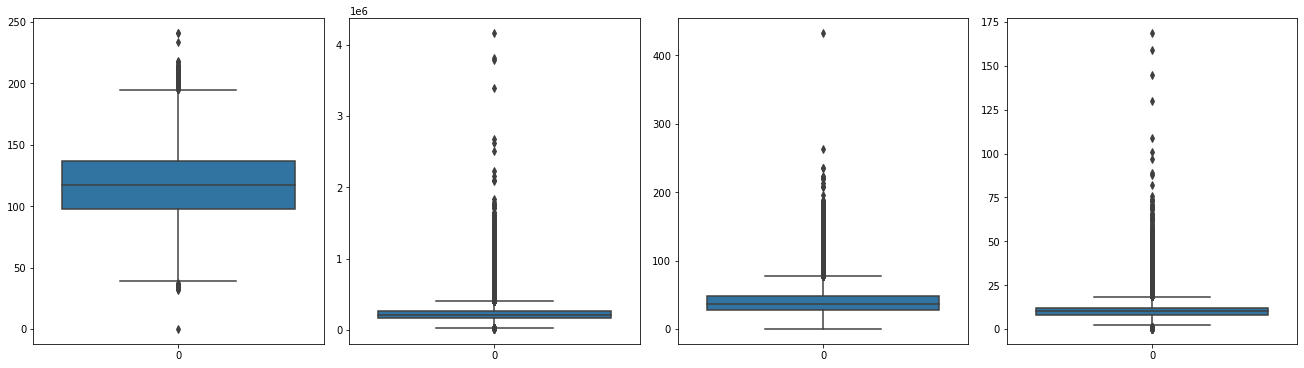

In [20]:
fig, ax = plt.subplots(1,4, figsize=(18,5), constrained_layout=True)

sns.boxplot(data=data_new['tempo'], ax=ax[0])
sns.boxplot(data=data_new['duration_ms'], ax=ax[1])
sns.boxplot(data=data_new['chorus_hit'], ax=ax[2])
sns.boxplot(data=data_new['sections'], ax=ax[3])
pass

На бокс-диаграммах видно, что перечисленные признаки имеют много нетипичных значений, поэтому их можно удалить, используя информацию о квантилях. Для других признаков проводить борьбу с выбросами не нужно, на мой взгляд. Так как для них встречается не так много нетипичных значений, и дополнительная обработка не требуется.

Покажем, что нет необходимости в борьбе с выбросами для других неперчисленных выше признаков на примере некоторых из них:

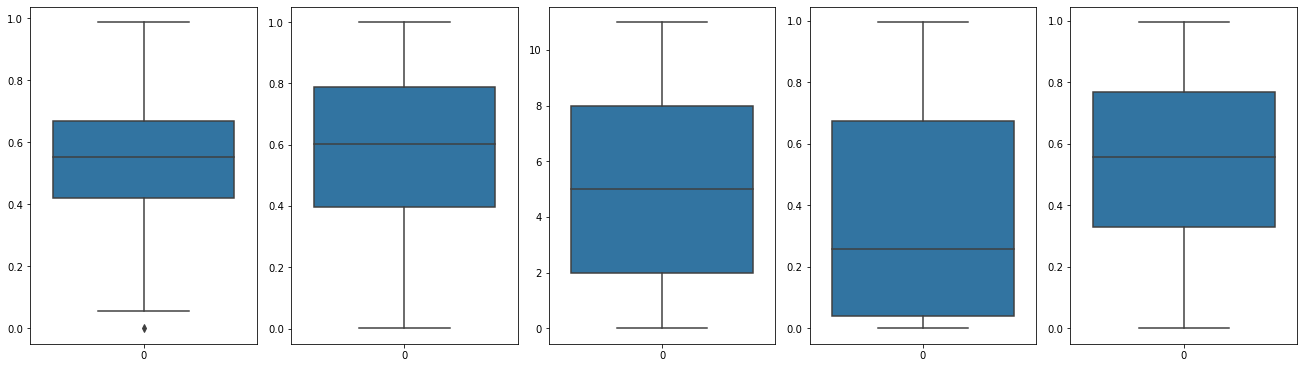

In [21]:
fig, ax = plt.subplots(1,5, figsize=(18,5), constrained_layout=True)

sns.boxplot(data=data_new['danceability'], ax=ax[0])
sns.boxplot(data=data_new['energy'], ax=ax[1])
sns.boxplot(data=data_new['key'], ax=ax[2])
sns.boxplot(data=data_new['acousticness'], ax=ax[3])
sns.boxplot(data=data_new['valence'], ax=ax[4])
pass

Удалим сначала объекты, для которых значение признака time_signature равно нулю, так как нет смысла рассматривать пустые треки:

In [22]:
data_new = data_new.drop(data_new[(data_new['time_signature'] == 0)].index)
data_new.shape

(41103, 16)

Теперь, как и было решено ранее, удалим объекты, для которых значение  признаков tempo, duration_ms, chorus_hit, sections, time_signature принимают нетипичные значения, и выведем, сколько объектов осталось в нашей задаче:

In [23]:
columns_ = ['tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections']

flag = np.zeros(data_new.shape[0])
for col in columns_:
    flag = flag | (data_new[col] > data_new[col].quantile(0.995)) | (data_new[col] < data_new[col].quantile(0.005))

data_clean = data_new.drop(data_new[flag].index)
print("old data:" + str(data_new.shape))
print("new data:" + str(data_clean.shape))

old data:(41103, 16)
new data:(39991, 16)


Как видно, после удаления выбросов, наша выборка уменьшилась на 1112 объектов. Теперь она содержит 39991 объект.

# *Обработка пропущенных значений*

Пропущенные значения в таблице представлены значениями *np.nan*. 
Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [24]:
data_clean.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

Как видно, в данных отсутствуют пропущенные значения.

# *Обработка категориальных признаков*

Алгоритмы из библиотеки *scikit-learn* (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых принаков. 

В данных имеется категориальный признак. Это *mode* - отвечающий за тип трека: минор или мажор.

Признак mode - бинарный, он уже закодирован 0 или 1. В целом, можно оставить этот признак в таком состоянии, но мы проведем бинаризацию и для удобства переименуем столбцы на *minor* и *major*:

In [25]:
mode_ = pd.get_dummies(data_clean['mode'])
mode_ = mode_.rename(columns={0: 'minor'})
mode_ = mode_.rename(columns={1: 'major'})

Добавляем новые столбцы *minor* и *major* и удаляем столбец *mode*:

In [26]:
data_clean = pd.concat((data_clean, mode_), axis=1)
data_clean = data_clean.drop(['mode'], axis=1)

Выведем первые строки таблицы, чтобы убедиться, что новые столбцы добавлены:

In [27]:
data_clean.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,minor,major
0,0.578,0.471,4,-7.270,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1,0,1
1,0.704,0.854,10,-5.477,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1,1,0
2,0.162,0.836,9,-3.009,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0,0,1
3,0.188,0.994,4,-3.745,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0,0,1
4,0.630,0.764,2,-4.353,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1,0,1


Таким образом,мы заменили имеющийся категориальный признак на 2 новых признака.

# *Нормализация количественных признаков*

Значения признаков, которые мы рассматриваем, имеют разные числовые  диапозоны. Поэтому, чтобы добиться большей точности алгоритмов машинного обучения, а также их качественной работы, полезно нормализовать количественные признаки. В качестве алгоритма нормализации будем использовать стандартизацию признаков.

In [28]:
data_new.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections', 'target'],
      dtype='object')

In [29]:
feature = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
           'duration_ms', 'time_signature', 'chorus_hit', 'sections',
           'minor', 'major']

data_new = data_clean.copy()
data_new[feature] = data_new[feature].apply(lambda x: (x - np.mean(x)) / (np.std(x)))
data_new.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,minor,major
count,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,39991.000000,3.999100e+04,3.999100e+04
mean,1.298793e-14,-4.918709e-15,-9.654618e-16,3.344377e-15,-1.224273e-14,-1.268590e-15,-6.595626e-16,5.823164e-15,3.754870e-14,-1.098043e-14,1.885777e-16,1.195187e-14,1.285851e-14,-5.049584e-15,0.508289,-7.097421e-15,7.097426e-15
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,0.499938,1.000013e+00,1.000013e+00
min,-2.750401e+00,-2.327115e+00,-1.475213e+00,-7.478609e+00,-6.059056e-01,-1.067241e+00,-4.991006e-01,-1.092207e+00,-2.058680e+00,-2.041948e+00,-2.031799e+00,-6.949559e+00,-1.837610e+00,-1.982613e+00,0.000000,-6.637365e-01,-1.506622e+00
25%,-6.666591e-01,-7.234782e-01,-9.097428e-01,-4.938424e-01,-4.653245e-01,-9.532277e-01,-4.991006e-01,-6.217742e-01,-7.973434e-01,-7.662319e-01,-6.529215e-01,2.480743e-01,-7.064354e-01,-6.330112e-01,0.000000,-6.637365e-01,-1.506622e+00
50%,7.104919e-02,8.682434e-02,-6.153704e-02,1.804566e-01,-3.477695e-01,-3.190260e-01,-4.987460e-01,-4.002229e-01,6.111834e-02,-5.732728e-02,-1.455022e-01,2.480743e-01,-2.298179e-01,-9.317048e-02,1.000000,-6.637365e-01,6.637365e-01
75%,7.236373e-01,8.212858e-01,7.866687e-01,7.236419e-01,-3.025005e-02,9.101852e-01,-3.319876e-01,3.470037e-01,8.405112e-01,5.996084e-01,4.040997e-01,2.480743e-01,4.537102e-01,4.466702e-01,1.000000,1.506622e+00,6.637365e-01
max,2.522511e+00,1.663521e+00,1.634874e+00,2.650593e+00,1.071330e+01,1.889991e+00,2.846505e+00,4.641376e+00,1.691443e+00,2.937199e+00,6.726036e+00,2.647285e+00,4.828265e+00,6.114998e+00,1.000000,1.506622e+00,6.637365e-01


# *Разделение выборки*

Для контроля за переобучением моделей машинного обучения разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [30]:
data_x = np.array(data_new.drop(['target'], axis=1))
data_y = np.array(data_new['target'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.25, random_state = 42)
print("Train data:"+str(x_train.shape))
print("Train data:"+str(x_test.shape))

Train data:(29993, 16)
Train data:(9998, 16)


# *Классификатор ближайших соседей* 

Попробуем запускать метод k ближайших соседей *kNN* для разных значений k. Построим график, отображающий зависимость точности на обучающей выборке и контрольной выборке от числа ближайших соседей. 

Запуск будем производить для различных k ( от 1 до 51, с шагом 2):

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import parallel_backend
from sklearn.metrics import f1_score
from tqdm import tqdm

target_names = ['Flop', 'Hit']
y_train_pred = []
y_test_pred = []
iter_ = range(1, 51, 2)
for n_neig in tqdm(iter_):
    neigh = KNeighborsClassifier( n_neighbors=n_neig)
    neigh.fit(x_train, y_train)
    
    y_train_pred.append(neigh.predict(x_train))
    y_test_pred.append(neigh.predict(x_test))

100%|██████████| 25/25 [26:39<00:00, 63.98s/it]


Собрали предсказания на тестовой выборке. Теперь необходимо найти количество ближайших соседей, которое будет оптимальным.

Причем необходимо выбрать минимум на тестовой выборке, потому что модель переобучится на тестовых данных, так что нельзя выбирать оптимальное значение на тренировочной выборке.

best number of neighbors:21


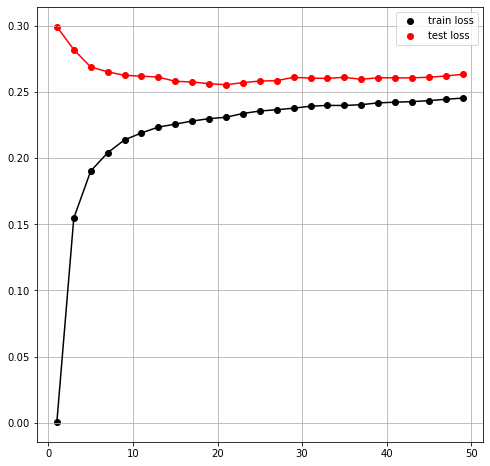

In [32]:
plt.rcParams['figure.figsize'] = (8, 8)
res_train = []
res_test = []

for i in range(len(iter_)):
    res_train.append(np.mean(y_train != y_train_pred[i]))
    res_test.append(np.mean(y_test != y_test_pred[i]))

plt.scatter(list(iter_)[::-1], res_train[::-1], color='black', label='train loss')
plt.scatter(list(iter_)[::-1], res_test[::-1], color='red', label='test loss')

plt.plot(list(iter_)[::-1], res_train[::-1], color='black')
plt.plot(list(iter_)[::-1], res_test[::-1], color='red')

plt.grid()
plt.legend()
print("best number of neighbors:" + str(np.argmin(res_test)*2 + 1))

Оптимальным количеством ближайших соседей является 21.

Посчитаем также точность *F1 score* , т.е. *F1 меру*:

In [33]:
neigh = KNeighborsClassifier(n_neighbors=21)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
f"F1: {f1_score(y_test, y_pred):.3f}, Error: {np.mean(y_test != y_pred):.3f}"

'F1: 0.778, Error: 0.256'

В результате получаем, что точность *F1=0.778*, а ошибка *0.256*, т.е. *25.6%*

Расчитаем точность и ошибку для некоторых других значений k (9, 4, 30):

In [34]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
f"F1: {f1_score(y_test, y_pred):.3f}, Error: {np.mean(y_test != y_pred):.3f}"

'F1: 0.767, Error: 0.263'

In [35]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
f"F1:{f1_score(y_test, y_pred):.3f}, Error: {np.mean(y_test != y_pred):.3f}"

'F1:0.711, Error: 0.286'

In [36]:
neigh = KNeighborsClassifier(n_neighbors=33)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
f"F1: {f1_score(y_test, y_pred):.3f}, Error: {np.mean(y_test != y_pred):.3f}"

'F1: 0.776, Error: 0.260'

Как видно из экспериментов, в ходе которых использовалось разное количество ближайших соседей для метода *kNN*, точность при данных значениях ниже, а значение ошибки больше.

Наилучшая точность, которую удалось достигнуть равна *77.8%* при том, что количество соседей равно *21*.

# *Дополнительно*
Попробуем использовать другие методы, а именно *метод линейной классификации* и *SVM* и сравним их с методом *kNN* (для этого рассчитаем точность и ошибку).
Метод линейной классификации:

In [37]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=1000, tol=1e-3, alpha=0.001)
clf.fit(x_train, y_train)
у_pred = clf.predict(x_test)

f"F1: {f1_score(y_test, у_pred):.3f}, Error: {np.mean(y_test != у_pred):.3f}"

'F1: 0.757, Error: 0.280'

Как видно, линейный классификатор работает с точностью около *75%*, что на *2%* меньше, чем при использовании метода k ближайших соседей. Помимо этого ошибка при использовании лин. классификатора *28%*, что выше на *3%*.


# *Выводы о проделанной работе*
В ходе выполнения работы был рассмотрен датасет, проведен анализ, визуализация и описательная статистика. 

В результате, можно подвести некоторый итог: как выяснилось, сильной коррелиции признаков нет; признаки *tempo, duration_ms, chorus_hit, sections, time_signature* содержали выбросы, которые были удалены в ходе работы; категориальный признак *mode* был обработан и преобразован; для более качественной работы алгоритмов была проведена нормализация количественных признаков; обработка пропущенных значений не потребовалась из-за их отсутсвия в данном датасете; было обучено несколько классификаторов при различных значениях параметров ( метод *kNN* и метод *линейной классификации*. Наилучшей точности (*77.8%*) удалось достичь при использовании метода *kNN* для *21 соседа*.


# *Нейронная сеть*

Выведем для напоминания общее число данных:

In [38]:
data_x.shape

(39991, 16)

Данных много, поэтому обучение нейронной сети занимает много времени. Чтобы несколько сократить время работы, возьмем только некоторую часть данных:

In [39]:
N_train = 7500
N_test = 2500

### *Разбиение имеющихся данных на обучающую и тестовую выборки:*

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, train_size = N_train, test_size = N_test,  stratify = data_y, random_state = 42)
print("Train data:"+str(X_train.shape))
print("Train data:"+str(X_test.shape))

Train data:(7500, 16)
Train data:(2500, 16)


### *Подбор _гипер_параметров*

Подберем оптимальное значение параметра регуляризации *alpha*:

In [41]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), solver = 'lbfgs', max_iter = 10000, 
                              activation = 'logistic', random_state = 42)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

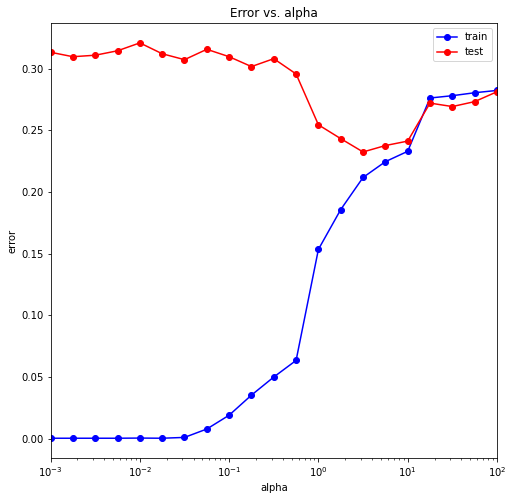

In [42]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

Рассмотрим, как менялась метрика в зависимости от гиперпараметра:

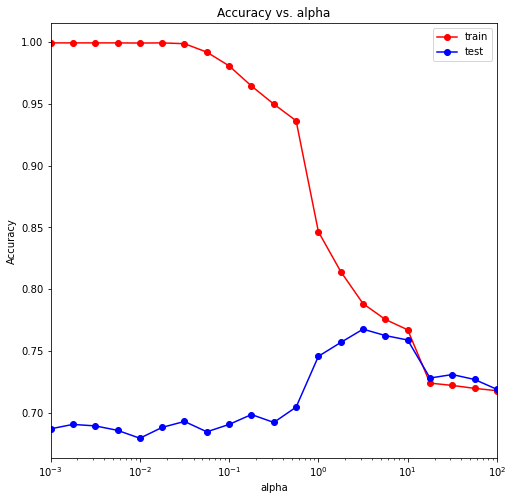

In [43]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Посчитаем минимальное значение ошибки: 

In [44]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Мин. ошибка на обучающей выборке: "+str(min_train_err))
print("Мин. ошибка на тестовой выборке: "+str(min_test_err))

Мин. ошибка на обучающей выборке: 0.0004
Мин. ошибка на тестовой выборке: 0.2324


Оптимальное значение *alpha*:

In [45]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]

print("Опт. alpha: "+str(alpha_opt))

Опт. alpha: 3.1622776601683795


### *Проведём обучение классификатора при найденном оптимальном значении alpha:*

In [46]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,), solver = 'lbfgs', max_iter = 10000, 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print("Ошибка на обучающей выборке: "+str(np.mean(y_train != y_train_pred)))
print("Ошибка на тестовой выборке: "+str(np.mean(y_test != y_test_pred)))

Ошибка на обучающей выборке: 0.21173333333333333
Ошибка на тестовой выборке: 0.2324


Теперь найдем оптимальное количество нейронов 1-го скрытого слоя при оптимальном значении *alpha*:

In [47]:
hidden_layer = np.arange(1, 30)
test_err = []
train_err = []
train_acc = []
test_acc = []

for neuron in hidden_layer:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron,), solver = 'lbfgs', max_iter = 10000,
                              activation = 'logistic', random_state = 42)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

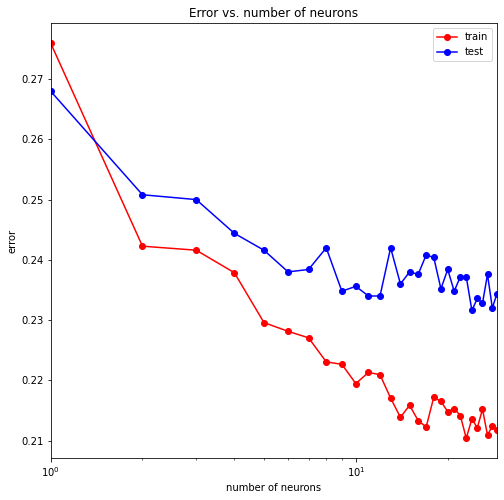

In [48]:
plt.semilogx(hidden_layer, train_err, 'r-o', label = 'train')
plt.semilogx(hidden_layer, test_err, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Error vs. number of neurons')
plt.xlabel('number of neurons')
plt.ylabel('error')
plt.legend()
pass

Рассмотрим, как менялась точность в зависимости от количества нейронов:

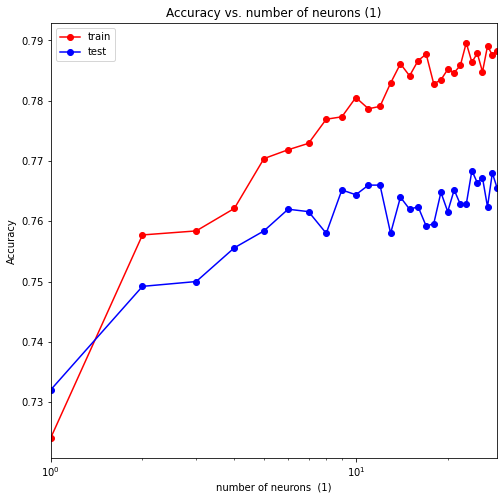

In [49]:
plt.semilogx(hidden_layer, train_acc, 'r-o', label = 'train')
plt.semilogx(hidden_layer, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Accuracy vs. number of neurons (1)')
plt.xlabel('number of neurons  (1)')
plt.ylabel('Accuracy')
plt.legend()
pass

Посчитаем минимальное значение ошибки:

In [50]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Мин. ошибка на обучающей выборке: "+str(min_train_err))
print("Мин. ошибка на тестовой выборке: " +str(min_test_err))

Мин. ошибка на обучающей выборке: 0.2104
Мин. ошибка на тестовой выборке: 0.2316


Оптимальное значение *количества нейронов 1-го слоя*:

In [51]:
neuron_opt_1 = hidden_layer[test_err == min_test_err]
neuron_opt_1 = neuron_opt_1[0]

print("Опт. количество нейронов 1-го слоя: "+str(neuron_opt_1))

Опт. количество нейронов 1-го слоя: 24


Добавим второй слой и определим количество нейронов 2-го скрытого слоя при оптимальном значении *alpha* и оптимальном количестве нейронов 1-го скрытого слоя при том же оптимальном *alpha*:

In [52]:
hidden_layer = np.arange(1, 30)
test_err = []
train_err = []
train_acc = []
test_acc = []

for neuron in hidden_layer:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt_1, neuron), solver = 'lbfgs', 
                              max_iter = 10000, activation = 'logistic', random_state = 42)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

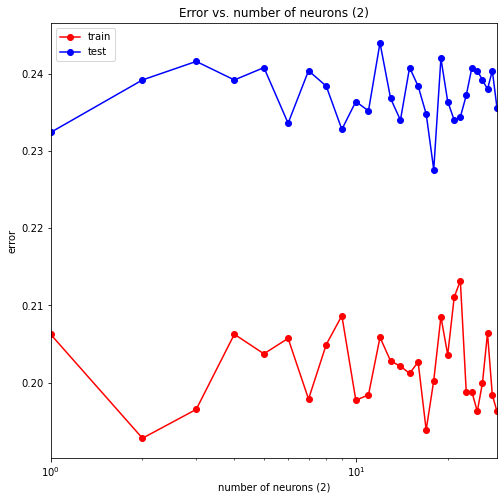

In [53]:
plt.semilogx(hidden_layer, train_err, 'r-o', label = 'train')
plt.semilogx(hidden_layer, test_err, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Error vs. number of neurons (2)')
plt.xlabel('number of neurons (2)')
plt.ylabel('error')
plt.legend()
pass

Рассмотрим, как менялась точность в зависимости от количества нейронов 2-го слоя:

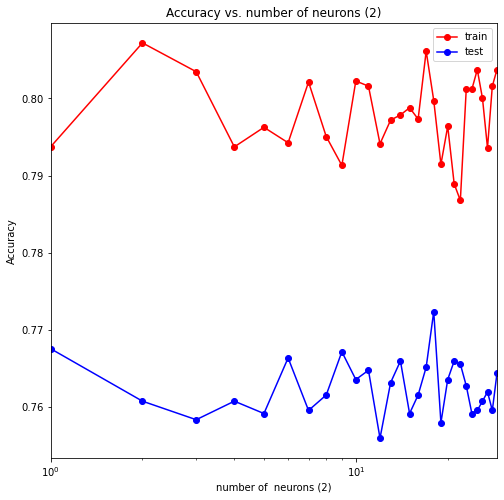

In [54]:
plt.semilogx(hidden_layer, train_acc, 'r-o', label = 'train')
plt.semilogx(hidden_layer, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Accuracy vs. number of neurons (2)')
plt.xlabel('number of  neurons (2)')
plt.ylabel('Accuracy')
plt.legend()
pass

Посчитаем минимальное значение ошибки:

In [55]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Мин. ошибка на обучающей выборке: " +str(min_train_err))
print("Мин. ошибка на тестовой выборке: " +str(min_test_err))

Мин. ошибка на обучающей выборке: 0.1928
Мин. ошибка на тестовой выборке: 0.2276


Оптимальное значение *количества нейронов 2-го слоя*:

In [56]:
neuron_opt_2 = hidden_layer[test_err == min_test_err]
neuron_opt_2 = neuron_opt_2[0]

print("Опт. количество нейронов 2-го слоя: " +str(neuron_opt_2))

Опт. количество нейронов 2-го слоя: 18


### *Обучим нейронную сеть при найденном оптимальном значении alpha и оптимальном количестве нейронов 1-го слоя:*

In [57]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt_1,), solver = 'lbfgs', max_iter = 10000, 
                          activation = 'logistic', random_state = 42)

mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print("Ошибка на обучающей выборке: " +str(err_train))
print("Ошибка на тестовой выборке: " +str(err_test))

Ошибка на обучающей выборке: 0.2136
Ошибка на тестовой выборке: 0.2316


### *Обучим нейронную сеть при найденном оптимальном значении alpha, а также оптимальном количестве нейронов 1-го и 2-го скрытых слоёв*

In [58]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt_1, neuron_opt_2),
                          solver = 'lbfgs', max_iter = 10000, activation = 'logistic', random_state = 42)

mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print("Ошибка на обучающей выборке: " +str(err_train))
print("Ошибка на тестовой выборке: " +str(err_test))

Ошибка на обучающей выборке: 0.20026666666666668
Ошибка на тестовой выборке: 0.2276


###### *Выводы о проделанной работе*
В ходе  работы были достигнуты следующие результаты: 

Обучение нейронной сети проводилось не на полной выборке, а на некоторой её части, что связанно с длительностью процесса.В случае, если параметра *alpha* = 3.1622776601, количество нейронов 1-го скрытого слоя = 24 , а количество нейронов 2-го скрытого слоя = 18, то удается достигнуть наименьшей ошибки на тестовой выборке ( а именно 0.2276, т.е. 22.76%) - данный показатель всё еще довольно высокий (то есть наблюдаем недообучение), но тем не менее, он оказался лучше, чем при использовании других классификаторов, рассмотренных в данной работе ранее( knn - 25.6%, линейный классификатор - 28%).

Отметим что, если увеличивать обучающую выборку, то ошибка может оказаться меньше, так как качество обучения может улучшаться благодаря увеличению количества входных данных.  